In [4]:
import numpy as np
from paper_drone_utils import state_dot, m, g, K, LQR
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from visualize import (
    plot_trajectory,
    animate_trajectory,
    plot_rotor_control,
    plot_angles,
)
from IPython.display import Video

plt.rcParams["figure.dpi"] = 300

Implementation of:

- https://harikrishnansuresh.github.io/assets/QuadcopterControlFinalVersion.pdf
- See https://harikrishnansuresh.github.io/assets/quadcopter_control_project_report.pdf for extended version

In [5]:
tf = 10

def rotor_ctrl_fn(t, x):
    return np.ones(4) * np.sqrt((m * g) / (4 * K))


res = solve_ivp(
    state_dot,
    (0, tf),
    np.zeros(12),
    t_eval=np.linspace(0, tf, 300),
    args=(rotor_ctrl_fn,),
)

In [6]:
X, Y, Z = res.y[:3, :]
phi, theta, psi = res.y[3:6, :]
print(f"Final Altitude: {Z[-1]:.2f}")
print(f"Final Angle: {phi[-1]:.2f}, {theta[-1]:.2f}, {psi[-1]:.2f}")
print(f"Final z velocity: {res.y[8, -1]:.2f}")
print(f"Final Angular Velocity: {np.linalg.norm(res.y[9:12, -1])}")

Final Altitude: 0.00
Final Angle: 0.00, 0.00, 0.00
Final z velocity: 0.00
Final Angular Velocity: 0.0


In [7]:
def lqr_demo(initial_conditions):
    tf = 20
    lqr = LQR()

    def demo_control(t, x):
        if t < 5:
            return np.array([0, 0, 0, 0])
        else:
            return lqr.get_control(x)

    res = solve_ivp(
        state_dot,
        (0, tf),
        initial_conditions,
        t_eval=np.linspace(0, tf, 300),
        args=(demo_control,),
    )
    rotor_ctrl = np.array(list(demo_control(ti, xi) for ti, xi in zip(res.t, res.y.T)))
    return res, rotor_ctrl, tf


res, rotor_ctrl, tf = lqr_demo(
    [0, 0, 0, -100, 200, -50, 100, -100, 200, 100, -100, 100]
)

In [8]:
X, Y, Z = res.y[:3, :]
phi, theta, psi = res.y[3:6, :]
print(f"Final Altitude: {Z[-1]:.2f}")
print(f"Final Angle: {phi[-1]:.2f}, {theta[-1]:.2f}, {psi[-1]:.2f}")
print(f"Final z velocity: {res.y[8, -1]:.2f}")
print(f"Final Angular Velocity: {np.linalg.norm(res.y[9:12, -1])}")

Final Altitude: 46.56
Final Angle: -198.20, 195.96, 2590.83
Final z velocity: -18.39
Final Angular Velocity: 233.74467908972412


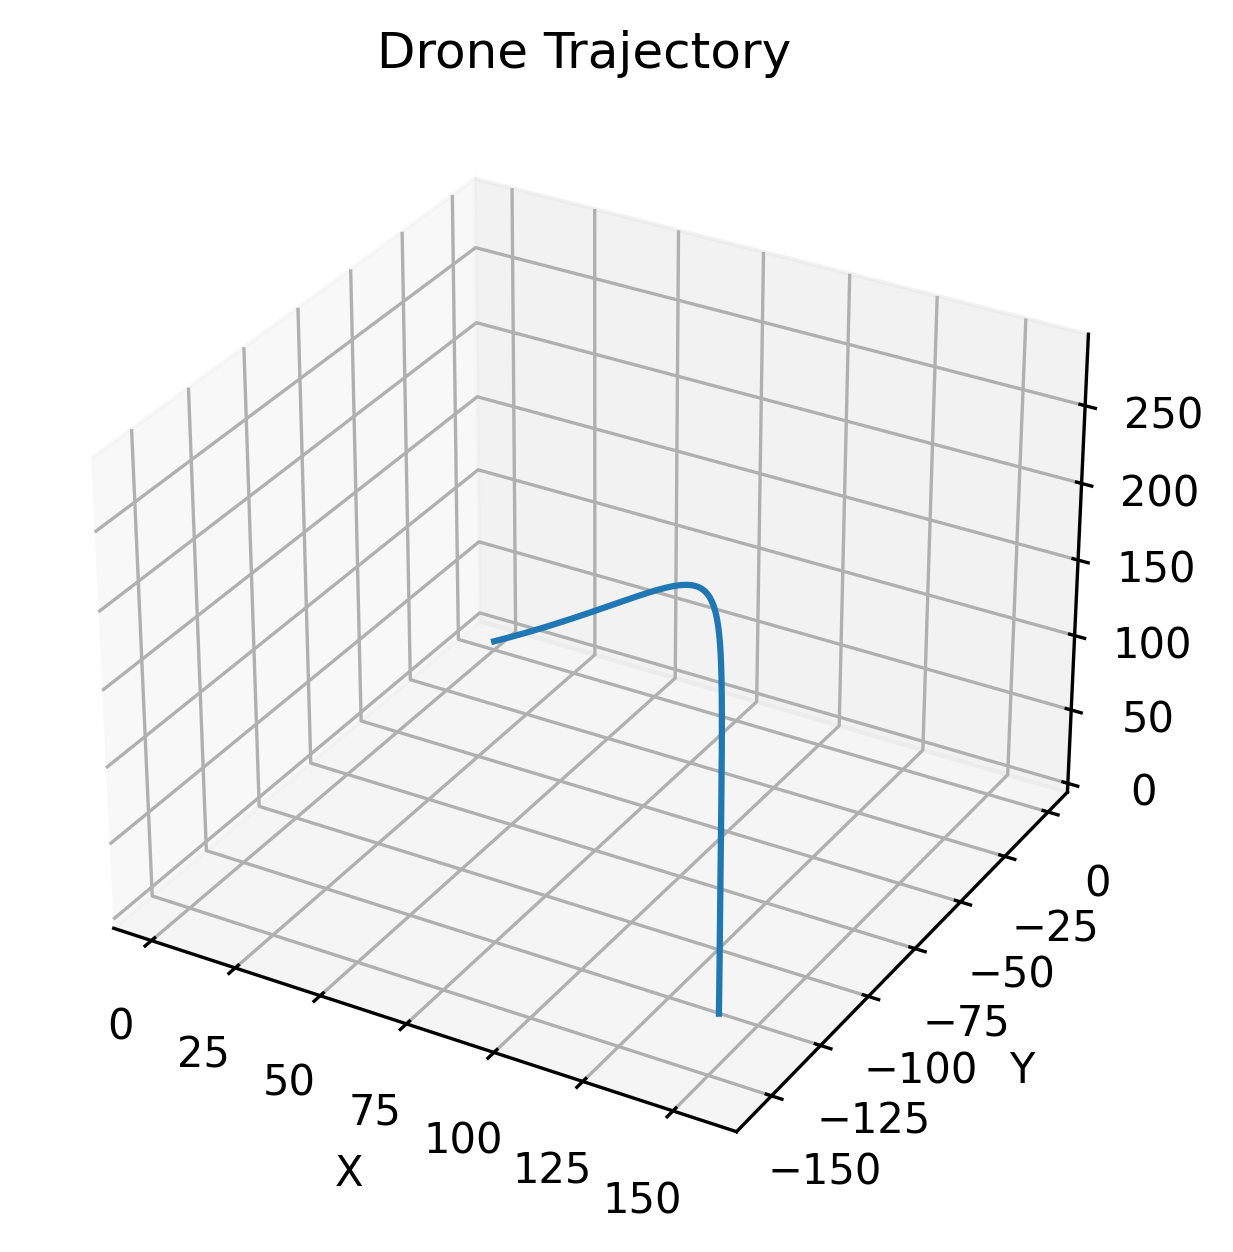

In [9]:
plot_trajectory(res.y)

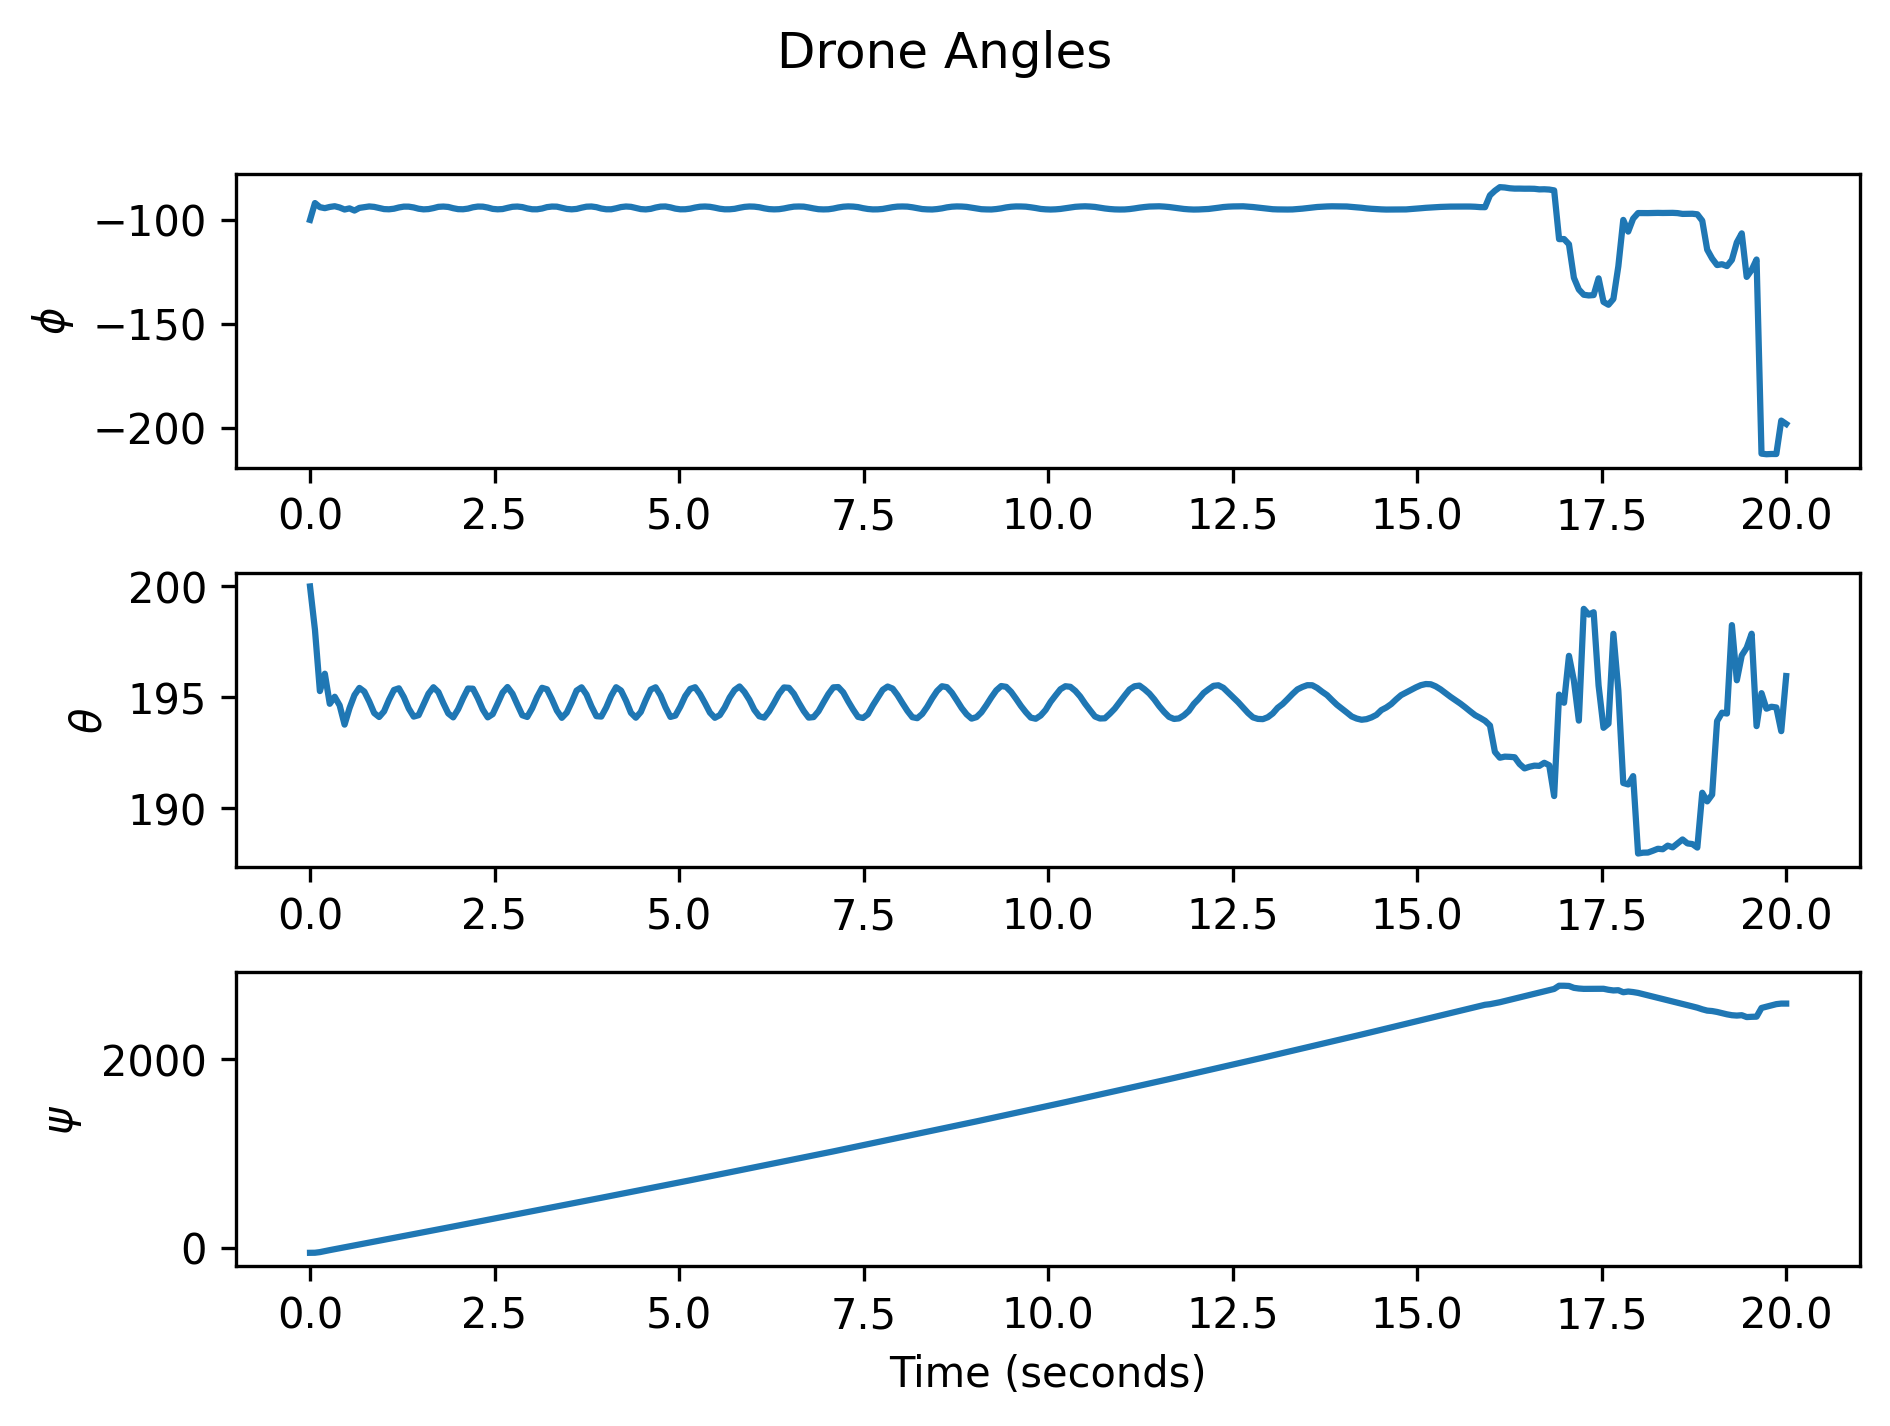

In [10]:
plot_angles(res.t, res.y)

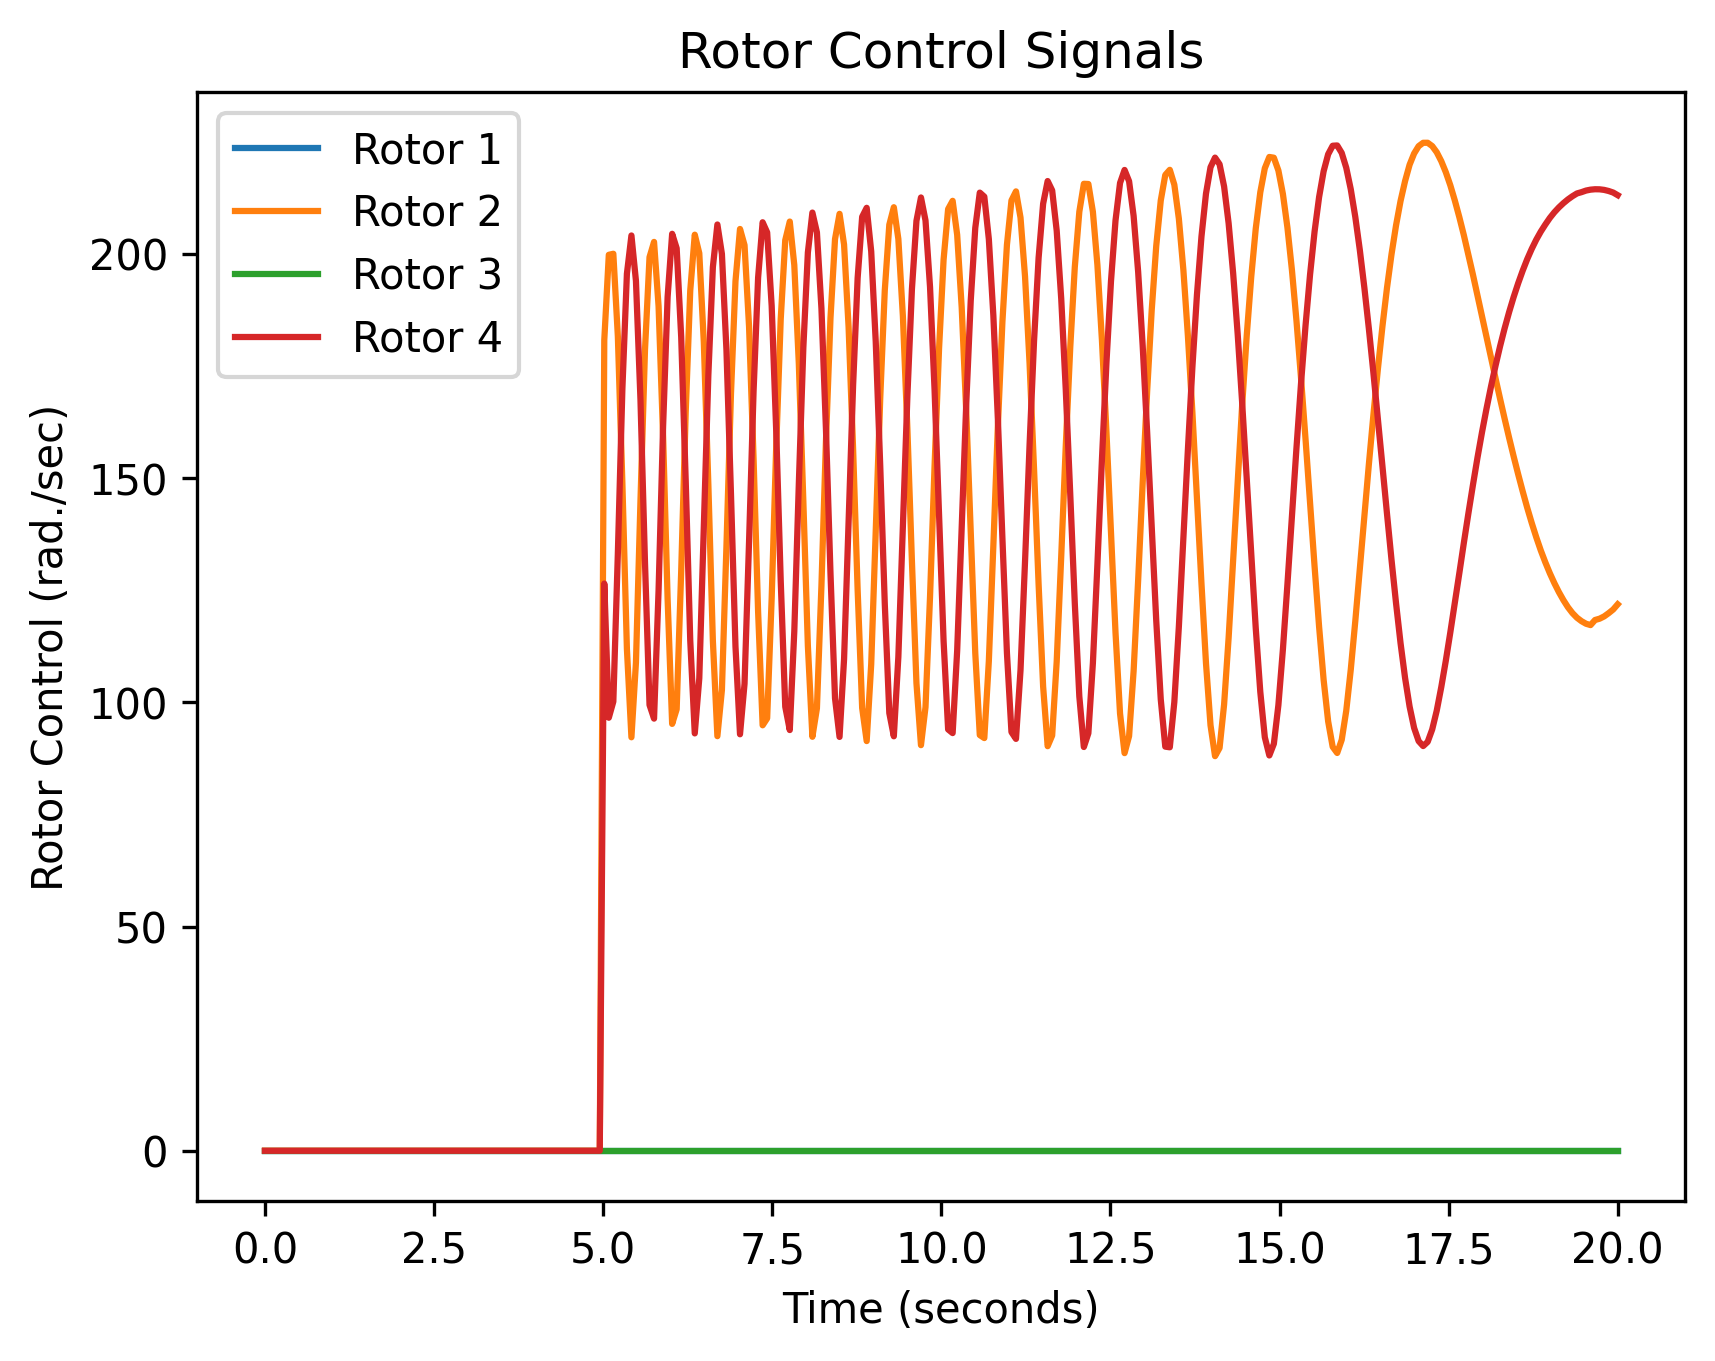

In [11]:
plot_rotor_control(res.t, rotor_ctrl)

In [12]:
Video(animate_trajectory(tf, res.y))